In [18]:
import iris
import iris.quickplot as qplt
import numpy as np
import matplotlib.pyplot as plt
import iris.coord_categorisation


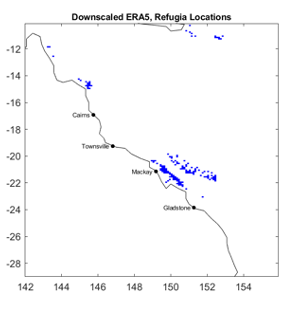

In [93]:
def extract_region(cube,lon_west,lon_east,lat_south,lat_north):
    cube_region_tmp = cube.intersection(longitude=(lon_west,lon_east))
    return cube_region_tmp.intersection(latitude=(lat_south,lat_north))


def area_avg(cube):
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'],iris.analysis.MEAN, weights=grid_areas)


def extract_year_range_inclusive(cube,start_year,end_year):
    try:
        iris.coord_categorisation.add_year(cube, 'time', name='year')
    except:
        pass
    year_constraint = iris.Constraint(year=lambda tmp_yr: start_year <= tmp_yr <= end_year)
    return cube.extract(year_constraint)


def annual_cycle(cube):
    try:
        iris.coord_categorisation.add_day_of_year(cube, 'time',name='day_of_year')
    except:
        pass
    return cube.aggregated_by('day_of_year',iris.analysis.MEAN)


In [92]:
dir(iris.coord_categorisation)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_month_season_numbers',
 '_month_year_adjusts',
 '_months_in_season',
 '_pt_date',
 '_validate_seasons',
 'add_categorised_coord',
 'add_day_of_month',
 'add_day_of_year',
 'add_hour',
 'add_month',
 'add_month_fullname',
 'add_month_number',
 'add_season',
 'add_season_membership',
 'add_season_number',
 'add_season_year',
 'add_weekday',
 'add_weekday_fullname',
 'add_weekday_number',
 'add_year',
 'calendar',
 'collections',
 'iris',
 'np']

In [6]:
directory = '/Users/ph290/Downloads/era5_GBR_heat_budget'

In [66]:
etide_cube = iris.load_cube(directory+'era5_GBR_Etide.nc')
ewind_cube = iris.load_cube(directory+'era5_GBR_Ewind.nc') 
latent_cube = iris.load_cube(directory+'era5_GBR_latent_heat_flux.nc') 
longwave_cube = iris.load_cube(directory+'era5_GBR_lw_out.nc') 
sensible_cube = iris.load_cube(directory+'era5_GBR_sensible_heat_flux.nc') 
shortwave_cube = iris.load_cube(directory+'era5_GBR_sw_in.nc') 

surface_temp_cube = iris.load_cube(directory+'era5_GBR_surfacetemperature.nc') 
bottom_temp_cube = iris.load_cube(directory+'era5_GBR_bottomtemperature.nc') 



/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2357: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name),
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2357: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name),
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2357: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotoni

In [40]:
def daily_to_seasonal(cube):
    try:
        iris.coord_categorisation.add_season_year(cube, 'time',name='season_year')
    except:
        pass
    try:
        iris.coord_categorisation.add_season_number(cube, 'time',name='season_number')
    except:
        pass
    cube = cube.aggregated_by(['season_year','season_number'],iris.analysis.MEAN)
    return cube

etide_cube = daily_to_seasonal(etide_cube)
ewind_cube = daily_to_seasonal(ewind_cube)
latent_cube = daily_to_seasonal(latent_cube)
longwave_cube = daily_to_seasonal(longwave_cube)
sensible_cube = daily_to_seasonal(sensible_cube)
shortwave_cube = daily_to_seasonal(shortwave_cube)


In [41]:
def select_season(cube,season):
    try:
        iris.coord_categorisation.add_season(cube, 'time',name='season')
    except:
        pass    
    cube = cube[np.where(cube.coord('season').points == season)]
    return cube

etide_cube_djf = select_season(etide_cube,'djf')
ewind_cube_djf = select_season(ewind_cube,'djf')
latent_cube_djf = select_season(latent_cube,'djf')
longwave_cube_djf = select_season(longwave_cube,'djf')
sensible_cube_djf = select_season(sensible_cube,'djf')
shortwave_cube_djf = select_season(shortwave_cube,'djf')

etide_cube_jja = select_season(etide_cube,'jja')
ewind_cube_jja = select_season(ewind_cube,'jja')
latent_cube_jja = select_season(latent_cube,'jja')
longwave_cube_jja = select_season(longwave_cube,'jja')
sensible_cube_jja = select_season(sensible_cube,'jja')
shortwave_cube_jja = select_season(shortwave_cube,'jja')

/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_number'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1784: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1

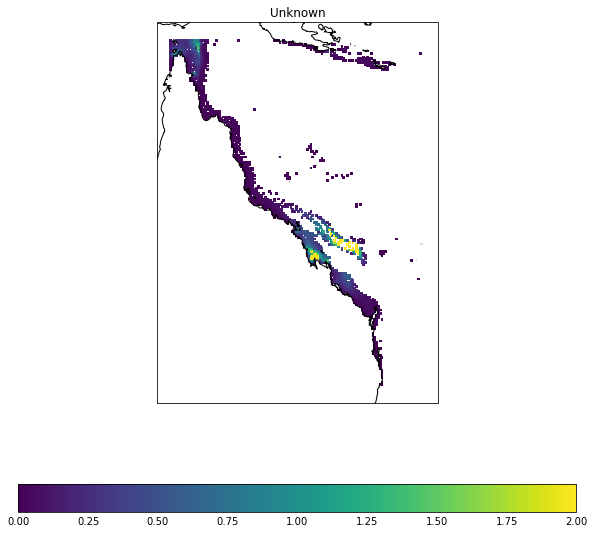

In [43]:
plt.figure(figsize=(10,10))
vmin=0.0
vmax=2.0
qplt.pcolormesh(etide_cube_djf.collapsed('time',iris.analysis.MEAN),vmin=vmin,vmax=vmax)
plt.gca().coastlines('10m')


/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_number'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1784: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1

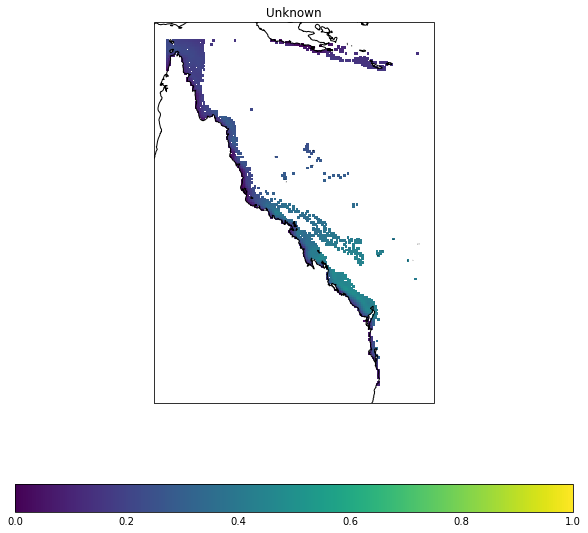

In [45]:
plt.figure(figsize=(10,10))
vmin=0.0
vmax=1.0
qplt.pcolormesh(ewind_cube_djf.collapsed('time',iris.analysis.MEAN),vmin=vmin,vmax=vmax)
plt.gca().coastlines('10m')


/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_number'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1784: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1

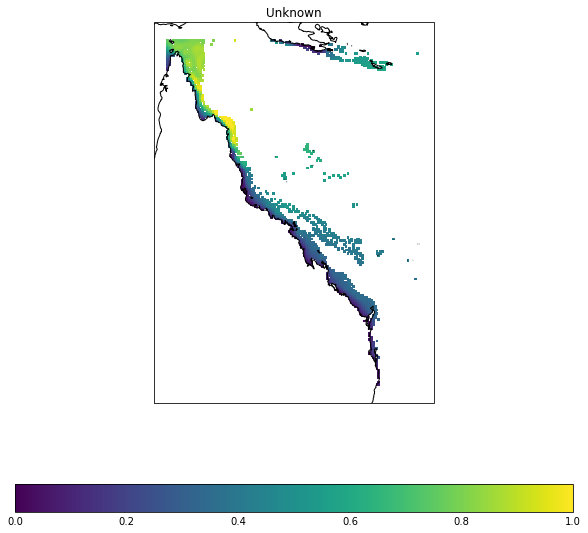

In [46]:
plt.figure(figsize=(10,10))
vmin=0.0
vmax=1.0
qplt.pcolormesh(ewind_cube_jja.collapsed('time',iris.analysis.MEAN),vmin=vmin,vmax=vmax)
plt.gca().coastlines('10m')

During the winters it looks like these areas are mixed strongly by the wind. This may be providing them a sooler starting point at he start of teh year and preventing extremes? Perhaps toop shallow though...

In [ ]:
# latent_cube = iris.load_cube(directory+'era5_GBR_latent_heat_flux.nc') 
# longwave_cube = iris.load_cube(directory+'era5_GBR_lw_out.nc') 
# sensible_cube = iris.load_cube(directory+'era5_GBR_sensible_heat_flux.nc') 
# shortwave_cube = iris.load_cube(directory+'era5_GBR_sw_in.nc') 

/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_number'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1784: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1

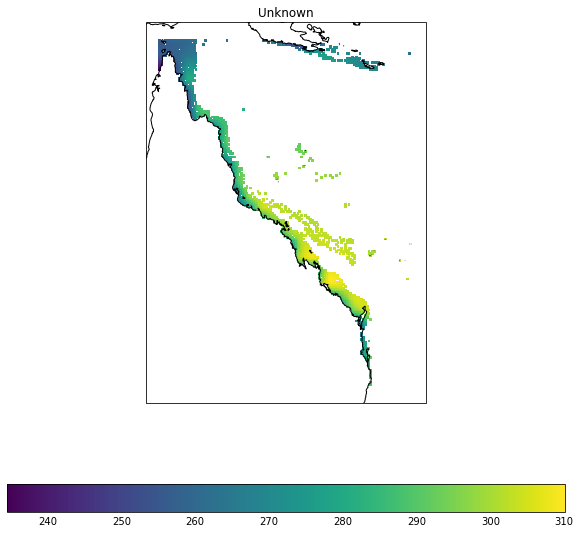

In [50]:
plt.figure(figsize=(10,10))
vmin=0.0
vmax=1.0
qplt.pcolormesh(shortwave_cube_djf.collapsed('time',iris.analysis.MEAN))
#,vmin=vmin,vmax=vmax)
plt.gca().coastlines('10m')

/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_number'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1784: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1

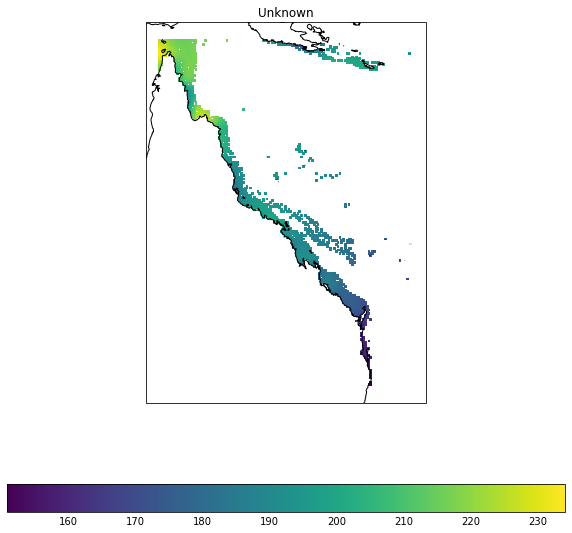

In [52]:
plt.figure(figsize=(10,10))
vmin=0.0
vmax=1.0
qplt.pcolormesh(shortwave_cube_jja.collapsed('time',iris.analysis.MEAN))
#,vmin=vmin,vmax=vmax)
plt.gca().coastlines('10m')

/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_number'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1784: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1

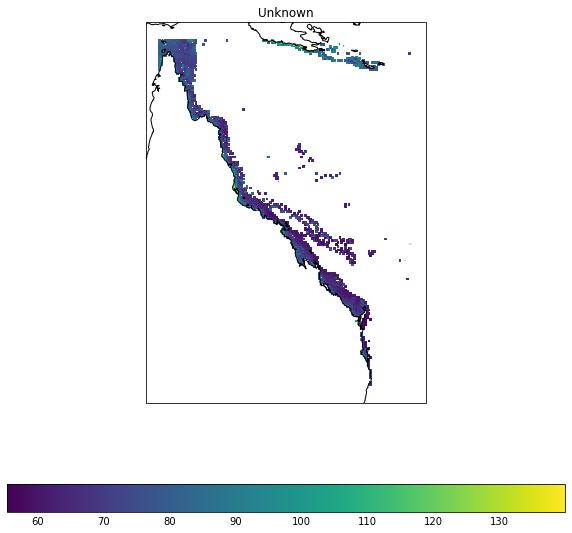

In [56]:
plt.figure(figsize=(10,10))
vmin=0.0
vmax=1.0
qplt.pcolormesh(longwave_cube_djf.collapsed('time',iris.analysis.MEAN))
#,vmin=vmin,vmax=vmax)
plt.gca().coastlines('10m')

/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_number'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1784: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1

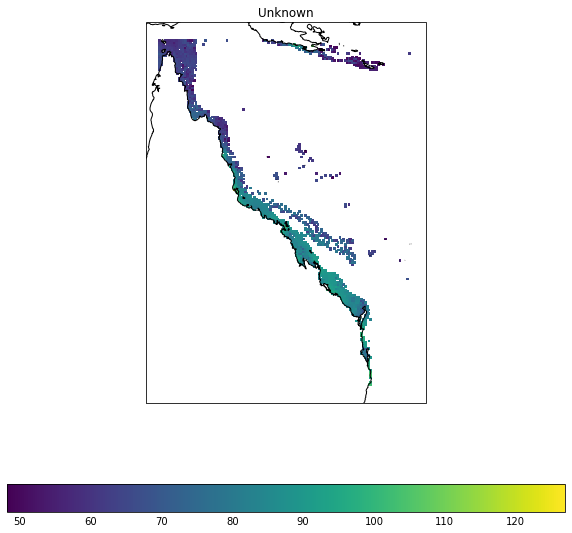

In [57]:
plt.figure(figsize=(10,10))
vmin=0.0
vmax=1.0
qplt.pcolormesh(longwave_cube_jja.collapsed('time',iris.analysis.MEAN))
#,vmin=vmin,vmax=vmax)
plt.gca().coastlines('10m')

/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_number'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1784: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1

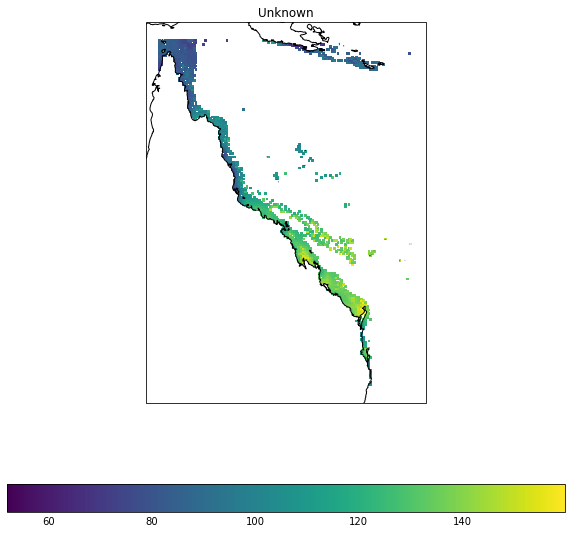

In [53]:
plt.figure(figsize=(10,10))
vmin=0.0
vmax=1.0
qplt.pcolormesh(latent_cube_djf.collapsed('time',iris.analysis.MEAN))
#,vmin=vmin,vmax=vmax)
plt.gca().coastlines('10m')

/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_number'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1784: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1

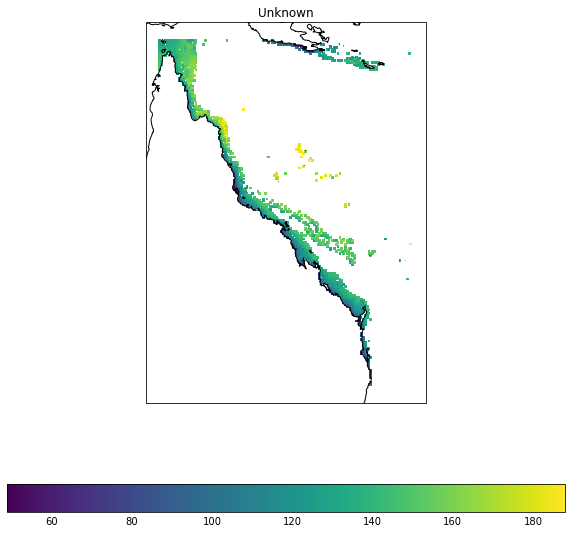

In [49]:
plt.figure(figsize=(10,10))
vmin=0.0
vmax=1.0
qplt.pcolormesh(latent_cube_jja.collapsed('time',iris.analysis.MEAN))
#,vmin=vmin,vmax=vmax)
plt.gca().coastlines('10m')

/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_number'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1784: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1

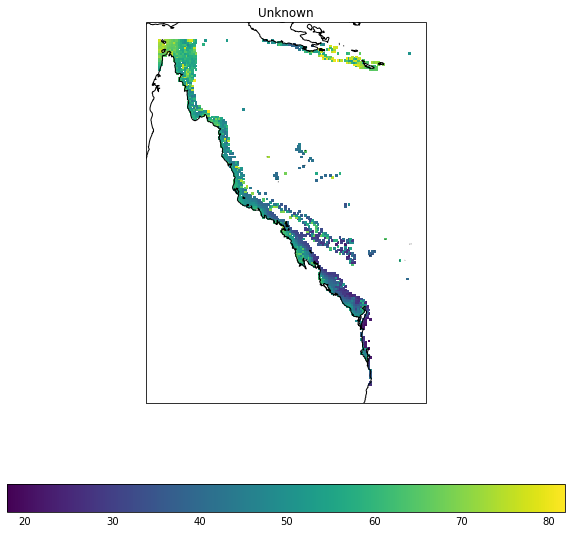

In [54]:
plt.figure(figsize=(10,10))
vmin=0.0
vmax=1.0
qplt.pcolormesh(sensible_cube_djf.collapsed('time',iris.analysis.MEAN))
#,vmin=vmin,vmax=vmax)
plt.gca().coastlines('10m')

/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_number'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1784: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1

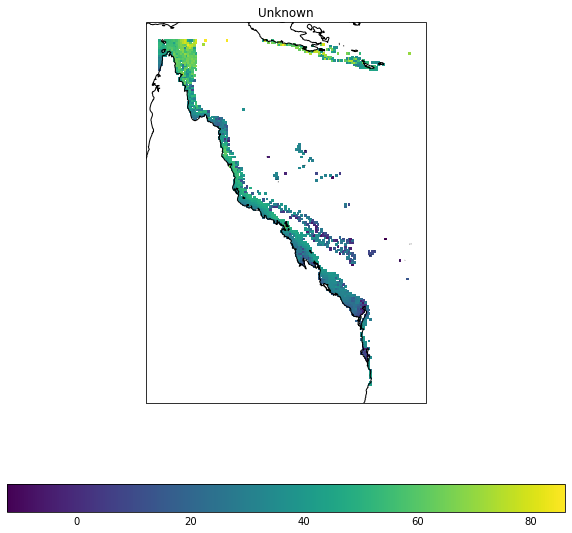

In [55]:
plt.figure(figsize=(10,10))
vmin=0.0
vmax=1.0
qplt.pcolormesh(sensible_cube_jja.collapsed('time',iris.analysis.MEAN))
#,vmin=vmin,vmax=vmax)
plt.gca().coastlines('10m')

combining...

In [59]:
short_djf = shortwave_cube_djf.collapsed('time',iris.analysis.MEAN)
long_djf = longwave_cube_djf.collapsed('time',iris.analysis.MEAN)
sensible_djf = sensible_cube_djf.collapsed('time',iris.analysis.MEAN)
latent_djf = latent_cube_djf.collapsed('time',iris.analysis.MEAN)

short_jja = shortwave_cube_jja.collapsed('time',iris.analysis.MEAN)
long_jja = longwave_cube_jja.collapsed('time',iris.analysis.MEAN)
sensible_jja = sensible_cube_jja.collapsed('time',iris.analysis.MEAN)
latent_jja = latent_cube_jja.collapsed('time',iris.analysis.MEAN)


/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_number'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_number'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/env

/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1784: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1784: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


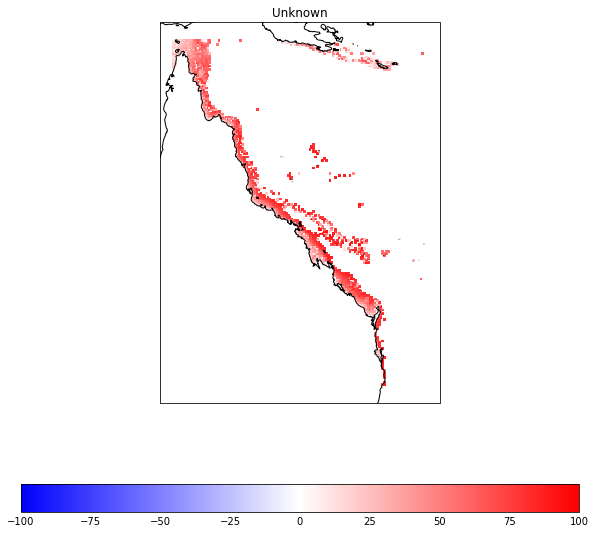

In [65]:
plt.figure(figsize=(10,10))
vmin=-100.0
vmax=100.0
qplt.pcolormesh(short_djf - long_djf - sensible_djf - latent_djf,cmap = 'bwr',vmin = vmin, vmax = vmax)
#,vmin=vmin,vmax=vmax)
plt.gca().coastlines('10m')

/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1784: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1784: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


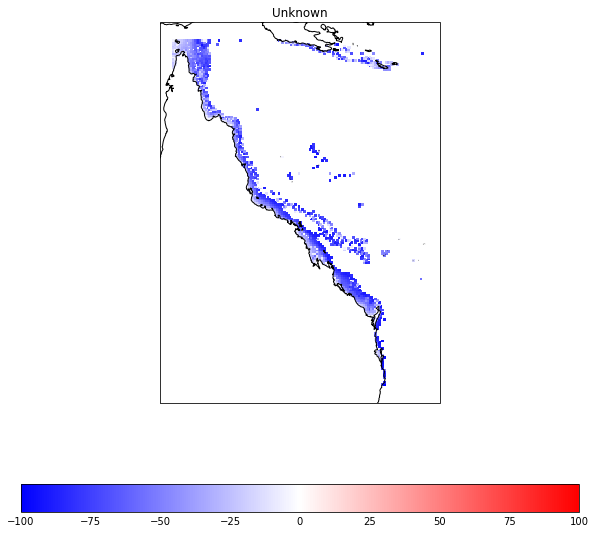

In [64]:
plt.figure(figsize=(10,10))
vmin=-100.0
vmax=100.0
qplt.pcolormesh(short_jja - long_jja - sensible_jja - latent_jja,cmap = 'bwr',vmin = vmin, vmax = vmax)
#,vmin=vmin,vmax=vmax)
plt.gca().coastlines('10m')

In [ ]:
Anual cycle analsysis of syrface and bottom temperatuers for the different regions of interest



In [70]:
surface_temp_cube = iris.load_cube(directory+'era5_GBR_surfacetemperature.nc') 
bottom_temp_cube = iris.load_cube(directory+'era5_GBR_bottomtemperature.nc') 

/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2357: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name),
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2357: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name),


## South GBR

/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


Text(0, 0.5, 'T ($\\degree$C)')

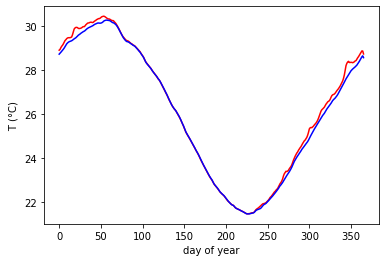

In [99]:
#extract_region(cube,lon_west,lon_east,lat_south,lat_north)
lon_west,lon_east,lat_south,lat_north = 151.5,152.5,-21.7,-21.1
surface_temp_south_offshore = area_avg(extract_region(surface_temp_cube,lon_west,lon_east,lat_south,lat_north))
bottom_temp_south_offshore = area_avg(extract_region(bottom_temp_cube,lon_west,lon_east,lat_south,lat_north))

start_year,end_year = 1985,2015
surface_temp_south_offshore = annual_cycle(extract_year_range_inclusive(surface_temp_south_offshore,start_year,end_year))
bottom_temp_south_offshore = annual_cycle(extract_year_range_inclusive(bottom_temp_south_offshore,start_year,end_year))


In [ ]:
plt.plot(surface_temp_south_offshore.data,'r')
plt.plot(bottom_temp_south_offshore.data,'b')
plt.xlabel('day of year')
plt.ylabel('T ($\degree$C)')

## Off Townsville

In [102]:


#extract_region(cube,lon_west,lon_east,lat_south,lat_north)
lon_west,lon_east,lat_south,lat_north = 147.0,148.0,-19.0,-18.0
surface_temp_south_tv = area_avg(extract_region(surface_temp_cube,lon_west,lon_east,lat_south,lat_north))
bottom_temp_south_tv = area_avg(extract_region(bottom_temp_cube,lon_west,lon_east,lat_south,lat_north))

start_year,end_year = 1985,2015
surface_temp_south_tv = annual_cycle(extract_year_range_inclusive(surface_temp_south_tv,start_year,end_year))
bottom_temp_south_tv = annual_cycle(extract_year_range_inclusive(bottom_temp_south_tv,start_year,end_year))



/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


Text(0, 0.5, 'T ($\\degree$C)')

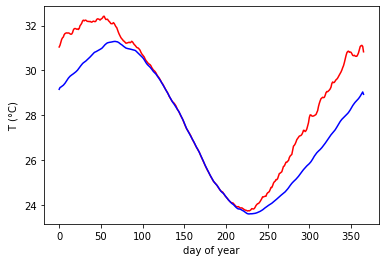

In [103]:
plt.plot(surface_temp_south_tv.data,'r')
plt.plot(bottom_temp_south_tv.data,'b')
plt.xlabel('day of year')
plt.ylabel('T ($\degree$C)')

## Off Cairns

In [105]:


#extract_region(cube,lon_west,lon_east,lat_south,lat_north)
lon_west,lon_east,lat_south,lat_north = 145.8,146.2,-16.8,-16.4
surface_temp_south_c = area_avg(extract_region(surface_temp_cube,lon_west,lon_east,lat_south,lat_north))
bottom_temp_south_c = area_avg(extract_region(bottom_temp_cube,lon_west,lon_east,lat_south,lat_north))

start_year,end_year = 1985,2015
surface_temp_south_c = annual_cycle(extract_year_range_inclusive(surface_temp_south_c,start_year,end_year))
bottom_temp_south_c = annual_cycle(extract_year_range_inclusive(bottom_temp_south_c,start_year,end_year))



/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


Text(0, 0.5, 'T ($\\degree$C)')

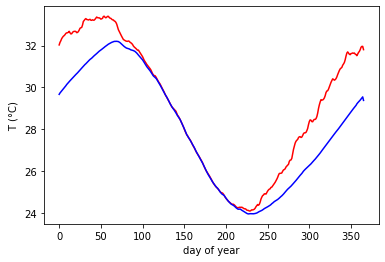

In [106]:
plt.plot(surface_temp_south_c.data,'r')
plt.plot(bottom_temp_south_c.data,'b')
plt.xlabel('day of year')
plt.ylabel('T ($\degree$C)')

## Cape Melville

In [110]:
#extract_region(cube,lon_west,lon_east,lat_south,lat_north)
lon_west,lon_east,lat_south,lat_north = 145.0,145.5,-15,-14.3
surface_temp_south_cm = area_avg(extract_region(surface_temp_cube,lon_west,lon_east,lat_south,lat_north))
bottom_temp_south_cm = area_avg(extract_region(bottom_temp_cube,lon_west,lon_east,lat_south,lat_north))

start_year,end_year = 1985,2015
surface_temp_south_cm = annual_cycle(extract_year_range_inclusive(surface_temp_south_cm,start_year,end_year))
bottom_temp_south_cm = annual_cycle(extract_year_range_inclusive(bottom_temp_south_cm,start_year,end_year))



/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


Text(0, 0.5, 'T ($\\degree$C)')

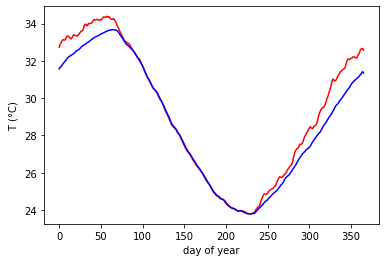

In [111]:
plt.plot(surface_temp_south_cm.data,'r')
plt.plot(bottom_temp_south_cm.data,'b')
plt.xlabel('day of year')
plt.ylabel('T ($\degree$C)')

## Cliff Island

In [112]:
#extract_region(cube,lon_west,lon_east,lat_south,lat_north)
lon_west,lon_east,lat_south,lat_north = 143.7,144.1,-14.5,-14.0
surface_temp_south_cl = area_avg(extract_region(surface_temp_cube,lon_west,lon_east,lat_south,lat_north))
bottom_temp_south_cl = area_avg(extract_region(bottom_temp_cube,lon_west,lon_east,lat_south,lat_north))

start_year,end_year = 1985,2015
surface_temp_south_cl = annual_cycle(extract_year_range_inclusive(surface_temp_south_cl,start_year,end_year))
bottom_temp_south_cl = annual_cycle(extract_year_range_inclusive(bottom_temp_south_cl,start_year,end_year))



/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


Text(0, 0.5, 'T ($\\degree$C)')

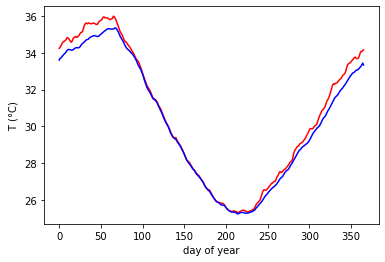

In [113]:
plt.plot(surface_temp_south_cl.data,'r')
plt.plot(bottom_temp_south_cl.data,'b')
plt.xlabel('day of year')
plt.ylabel('T ($\degree$C)')

## Iron Range

In [114]:
#extract_region(cube,lon_west,lon_east,lat_south,lat_north)
lon_west,lon_east,lat_south,lat_north = 143.2,143.7,-12.8,-12.2
surface_temp_south_ir = area_avg(extract_region(surface_temp_cube,lon_west,lon_east,lat_south,lat_north))
bottom_temp_south_ir = area_avg(extract_region(bottom_temp_cube,lon_west,lon_east,lat_south,lat_north))

start_year,end_year = 1985,2015
surface_temp_south_ir = annual_cycle(extract_year_range_inclusive(surface_temp_south_ir,start_year,end_year))
bottom_temp_south_ir = annual_cycle(extract_year_range_inclusive(bottom_temp_south_ir,start_year,end_year))



/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


Text(0, 0.5, 'T ($\\degree$C)')

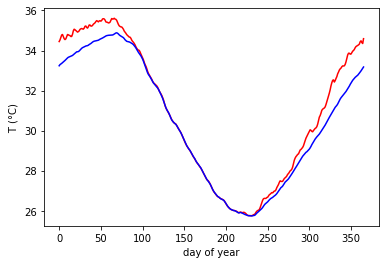

In [115]:
plt.plot(surface_temp_south_ir.data,'r')
plt.plot(bottom_temp_south_ir.data,'b')
plt.xlabel('day of year')
plt.ylabel('T ($\degree$C)')